diminos case study

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df=pd.read_csv('diminos.csv')

In [47]:
df.head()

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056


In [48]:
df.tail()

,order_id,order_placed_at,order_delivered_at
14995,1538106,2023-03-27 23:37:05,2023-03-27 23:52:37.409378
14996,1538107,2023-03-27 23:47:38,2023-03-28 00:04:22.672912
14997,1538108,2023-03-27 23:50:16,2023-03-28 00:05:40.676238
14998,1538109,2023-03-27 23:52:44,2023-03-28 00:08:41.810358
14999,1538110,2023-03-27 23:58:20,2023-03-28 00:13:42.499311


In [49]:
df.shape

(15000, 3)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            15000 non-null  int64 
 1   order_placed_at     15000 non-null  object
 2   order_delivered_at  15000 non-null  object
dtypes: int64(1), object(2)
memory usage: 351.7+ KB


In [51]:
#converting dtpye object to datetime
df['order_placed_at'] = pd.to_datetime(df['order_placed_at'])
df['order_delivered_at']=pd.to_datetime(df['order_delivered_at'])

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            15000 non-null  int64         
 1   order_placed_at     15000 non-null  datetime64[ns]
 2   order_delivered_at  15000 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1)
memory usage: 351.7 KB


In [53]:
df.columns

Index(['order_id', 'order_placed_at', 'order_delivered_at'], dtype='object')

In [54]:
df['time_of_order'] = (df['order_delivered_at'] - df['order_placed_at']).dt.total_seconds()/60
df.head()

,order_id,order_placed_at,order_delivered_at,time_of_order
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,17.140719
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,15.598754
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,15.104856
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,38.533657
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,16.176984


In [55]:
# check total numbers of order delivered after 31 minutes
late_min = df.loc[df['time_of_order'] > 31,'time_of_order'].count()
late_min

np.int64(557)

In [56]:
# check quantile of Order who's order > 31 min
per95 = df['time_of_order'].quantile(0.95)
per95

np.float64(27.261043996666658)

In [57]:
# check order late
order_late = late_min / 15000 *100
order_late

np.float64(3.713333333333333)

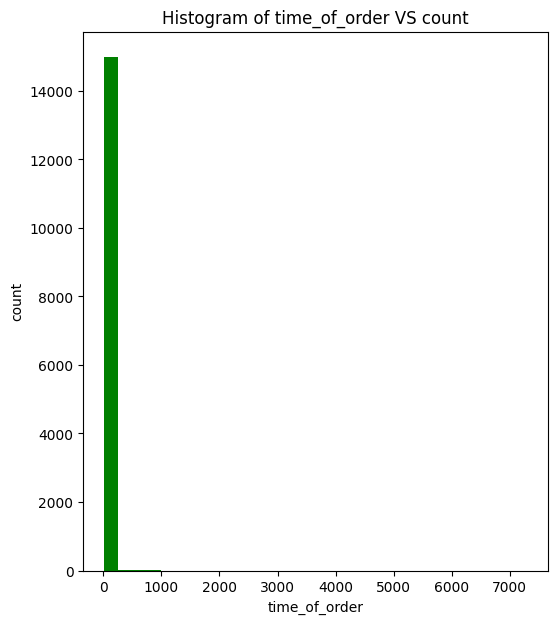

In [58]:
#histogram of deliverd time ditribution
plt.figure(figsize=(6,7))
plt.hist(df['time_of_order'] , color='green', bins=30,)
plt.xlabel('time_of_order')
plt.ylabel('count')
plt.title('Histogram of time_of_order VS count')
plt.show()

Text(0.5, 0, 'delivere_time')

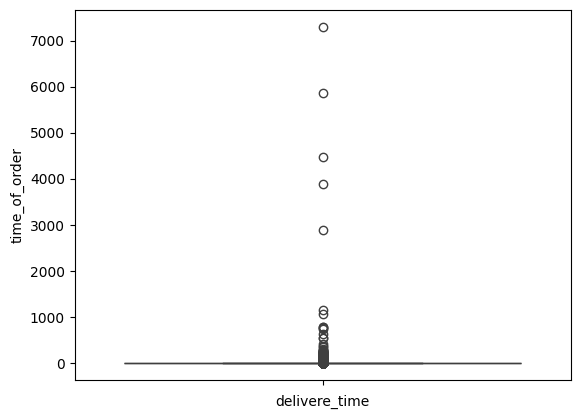

In [63]:
# boxplot for outlier

sns.boxplot(data=df['time_of_order'])
plt.xlabel('delivere_time')
